# 배민스토어 데이터 분석
- 기준일시 : 8월 25일(금) 오후 4시
- 위치 : "강남역"
- 상세 : "지금 인기있는 상품" 189개 중 69개 수집

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

In [2]:
# 1. 배민스토어에서 직접 수집하여 가공한 데이터입니다. 
# 과일, 건강기능식품, 육류, 반찬/밀키트, 꽃, 장난감, 화장품, 과자, 음료, 케이크, 그릇, 전자기기, 반려동물용품
bms_rawdata = """
육류, 28800, 35, 20
육류, 19900, 29, 12
꽃, 50000, 24, 9
과일, 19500, 34, 
케이크, 23000, 26, 14
과자, 1700, 50, 
꽃, 10000, 35, 25
과자, 1700, 50, 
꽃, 80000, 28, 10
꽃, 85000, 33, 
육류, 11000, , 
전자기기, 168000, 180, 
음료, 3050, 50, 
꽃, 12000, 29, 
전자기기, 359000, 150, 15
그릇, 30000, 31, 13
반찬/밀키트, 13900, 34, 17
장난감, 13500, 28, 26
음료, 1900, 50, 
음료, 900, 50, 
육류, 26900, 34, 17
꽃, 20000, 30, 20
꽃, 70000, 68, 50
꽃, 150000, , 
꽃, 32900, 40, 30
꽃, 29900, 40, 30
기타, 900, 50, 
꽃, 25000, , 
반찬/밀키트, 3000, 39, 20
꽃, 20000, 30, 15
그릇, 50000, 31, 13
음료, 2300, 50, 
케이크, 68000, 180, 
육류, 9700, 28, 13
화장품, 25000, 14, 5
반찬/밀키트, 4500, 28, 13
반찬/밀키트, 3200, 26, 
반찬/밀키트, 5950, 32, 
육류, 3300, 33, 20
꽃, 15000, 50, 30
꽃, 60000, 27, 10
음료, 2200, 45, 30
반려동물용품, 4500, 26, 11
꽃, 2900, 40, 30
과자, 1000, 40, 
전자기기, 189000, 150, 
화장품, 16000, 14, 5
건강기능식품, 29800, 30, 
기타, 1500, 40, 30
육류, 59800, 34, 14
과일, 2100, 50, 
육류, 27650, 34, 15
기타, 490, 40, 30
과자, 1700, 45, 30
반찬/밀키트, 3900, 24, 
건강기능식품, 75000, 40, 
반찬/밀키트, 3900, 23, 
전자기기, 72000, 150, 15
육류, 9200, 28, 13
위스키, 43000, , 20
꽃, 28000, 35, 25
꽃, 36000, 39, 20
반찬/밀키트, 11800, 22, 5
건강기능식품, 12750, 30, 
화장품, 70000, 14, 5
반려동물용품, 2400, 49, 30
꽃, 100000, 24, 9
장난감, 13500, 27, 16
반려동물용품, 168000, 40, 20
"""

In [3]:
# 2. 데이터를 데이터프레임으로 변환하기 위해, 엔터 값을 기준으로 나눈 리스트로 만들어줍니다.
bms_data = bms_rawdata.strip().split('\n')
bms_data

['육류, 28800, 35, 20',
 '육류, 19900, 29, 12',
 '꽃, 50000, 24, 9',
 '과일, 19500, 34, ',
 '케이크, 23000, 26, 14',
 '과자, 1700, 50, ',
 '꽃, 10000, 35, 25',
 '과자, 1700, 50, ',
 '꽃, 80000, 28, 10',
 '꽃, 85000, 33, ',
 '육류, 11000, , ',
 '전자기기, 168000, 180, ',
 '음료, 3050, 50, ',
 '꽃, 12000, 29, ',
 '전자기기, 359000, 150, 15',
 '그릇, 30000, 31, 13',
 '반찬/밀키트, 13900, 34, 17',
 '장난감, 13500, 28, 26',
 '음료, 1900, 50, ',
 '음료, 900, 50, ',
 '육류, 26900, 34, 17',
 '꽃, 20000, 30, 20',
 '꽃, 70000, 68, 50',
 '꽃, 150000, , ',
 '꽃, 32900, 40, 30',
 '꽃, 29900, 40, 30',
 '기타, 900, 50, ',
 '꽃, 25000, , ',
 '반찬/밀키트, 3000, 39, 20',
 '꽃, 20000, 30, 15',
 '그릇, 50000, 31, 13',
 '음료, 2300, 50, ',
 '케이크, 68000, 180, ',
 '육류, 9700, 28, 13',
 '화장품, 25000, 14, 5',
 '반찬/밀키트, 4500, 28, 13',
 '반찬/밀키트, 3200, 26, ',
 '반찬/밀키트, 5950, 32, ',
 '육류, 3300, 33, 20',
 '꽃, 15000, 50, 30',
 '꽃, 60000, 27, 10',
 '음료, 2200, 45, 30',
 '반려동물용품, 4500, 26, 11',
 '꽃, 2900, 40, 30',
 '과자, 1000, 40, ',
 '전자기기, 189000, 150, ',
 '화장품, 16000, 14, 5',
 '건강

In [4]:
# 3. 누락된 데이터가 존재하고, int값으로 정의해주어야 하는 데이터가 있으므로 아래 과정을 거쳐 리스트로 만들어줍니다.
# x가 숫자로만 이루어져 있다면 int(x)로 변환합니다.
# x가 숫자로 이루어져 있지 않다면 (x가 숫자가 아니라면) x를 그대로 유지합니다.
# 만약 x가 빈 문자열이라면 (x가 비어있다면) np.nan을 반환합니다.

bms_data_cleaned = [list(map(lambda x: int(x) if x.isdigit() 
                             else (x if x else np.nan), 
                             data.split(', '))) for data in bms_data]
bms_data_cleaned

[['육류', 28800, 35, 20],
 ['육류', 19900, 29, 12],
 ['꽃', 50000, 24, 9],
 ['과일', 19500, 34, nan],
 ['케이크', 23000, 26, 14],
 ['과자', 1700, 50, nan],
 ['꽃', 10000, 35, 25],
 ['과자', 1700, 50, nan],
 ['꽃', 80000, 28, 10],
 ['꽃', 85000, 33, nan],
 ['육류', 11000, nan, nan],
 ['전자기기', 168000, 180, nan],
 ['음료', 3050, 50, nan],
 ['꽃', 12000, 29, nan],
 ['전자기기', 359000, 150, 15],
 ['그릇', 30000, 31, 13],
 ['반찬/밀키트', 13900, 34, 17],
 ['장난감', 13500, 28, 26],
 ['음료', 1900, 50, nan],
 ['음료', 900, 50, nan],
 ['육류', 26900, 34, 17],
 ['꽃', 20000, 30, 20],
 ['꽃', 70000, 68, 50],
 ['꽃', 150000, nan, nan],
 ['꽃', 32900, 40, 30],
 ['꽃', 29900, 40, 30],
 ['기타', 900, 50, nan],
 ['꽃', 25000, nan, nan],
 ['반찬/밀키트', 3000, 39, 20],
 ['꽃', 20000, 30, 15],
 ['그릇', 50000, 31, 13],
 ['음료', 2300, 50, nan],
 ['케이크', 68000, 180, nan],
 ['육류', 9700, 28, 13],
 ['화장품', 25000, 14, 5],
 ['반찬/밀키트', 4500, 28, 13],
 ['반찬/밀키트', 3200, 26, nan],
 ['반찬/밀키트', 5950, 32, nan],
 ['육류', 3300, 33, 20],
 ['꽃', 15000, 50, 30],
 ['꽃', 60000, 27

In [5]:
# 4. 만들어 둔 리스트로 데이터프레임을 정의하였습니다. nan값이 있는 데이터의 경우 int로 정의할 수 없으므로, float로 정의해주었습니다.
# 10개의 샘플 데이터를 뽑아봅니다.
bms_df = pd.DataFrame(bms_data_cleaned, 
                      columns=["카테고리", "금액", "배달시간(mid)", "픽업시간(mid)"])
bms_df.sample(10)

,카테고리,금액,배달시간(mid),픽업시간(mid)
23,꽃,150000,NaN,NaN
1,육류,19900,29.0,12.0
13,꽃,12000,29.0,NaN
21,꽃,20000,30.0,20.0
50,과일,2100,50.0,NaN
49,육류,59800,34.0,14.0
47,건강기능식품,29800,30.0,NaN
19,음료,900,50.0,NaN
5,과자,1700,50.0,NaN
54,반찬/밀키트,3900,24.0,NaN


In [6]:
bms_df.카테고리.unique() 


array(['육류', '꽃', '과일', '케이크', '과자', '전자기기', '음료', '그릇', '반찬/밀키트', '장난감',
       '기타', '화장품', '반려동물용품', '건강기능식품', '위스키'], dtype=object)

In [7]:
# 5. 기본 정보를 출력하여 null 값 갯수와, 데이터 타입은 어떤지 확인해봅니다. 
# nan값이 있는 데이터의 경우, 데이터프레임으로 변환하는 과정에서 float로 정의되었습니다.
bms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   카테고리       69 non-null     object 
 1   금액         69 non-null     int64  
 2   배달시간(mid)  65 non-null     float64
 3   픽업시간(mid)  44 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


# Insight 1.
- "지금 인기있는 상품"의 픽업시간은 약 37%의 데이터가 유실되어있다는 사실을 기반으로,
- `픽업시간 혹은 픽업 여부는 배민스토어의 구매에 중요한 요인은 아닐 것`이라는 가설을 세워볼 수 있습니다.

===== 여기서부터 시각화로 넘어가는 부분이고 아직 작업 안 함, 내가 그리고 싶은 그래프=====  
6. 카테고리별 평균 금액에 대한 세로 막대 그래프  -> 전자기기는 평균 금액이 높음, 간식은 평균 금액이 낮음 이런 식으로 적어보고 원인 찾아보기.  
7. 카테고리별 count 그래프 : 누군가에게 줄 선물을 가장 많이 구매한다는 내용. 식재료도 많이 구매함.  
8. 카테고리별 배달시간과 픽업시간 그래프 -> 배달시간,픽업시간이 큰 영향을 안 미친다는 걸 보여주고 싶은데 괜찮을지?  
9. 그 외 재현의 아이디어  
10. 6번 7번을 하나에 묶어봐도 괜찮을 것 같음!!  

In [8]:
# 한국어 표시 및 그래프 옵션 설정
sns.set_context("notebook", rc={"lines.linewidth": 1.5})
sns.set(color_codes=True)
sns.set_palette("pastel")

rc('font', family='Applegothic')
plt.rcParams['font.family']='Applegothic'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


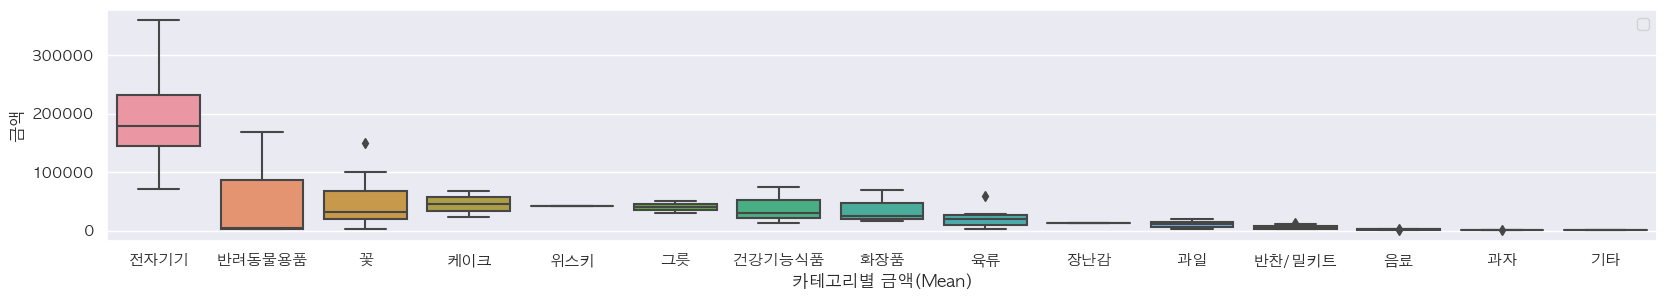

In [9]:
# 6. 카테고리별 평균 금액에 대한 boxplot으로 변경
# 6-1. 카테고리별 평균 금액 계산
category_avg_price = bms_df.groupby("카테고리")["금액"].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 3))
sns.boxplot(x = "카테고리", y = "금액", data = bms_df, order = category_avg_price.index)
plt.xlabel("카테고리별 금액(Mean)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


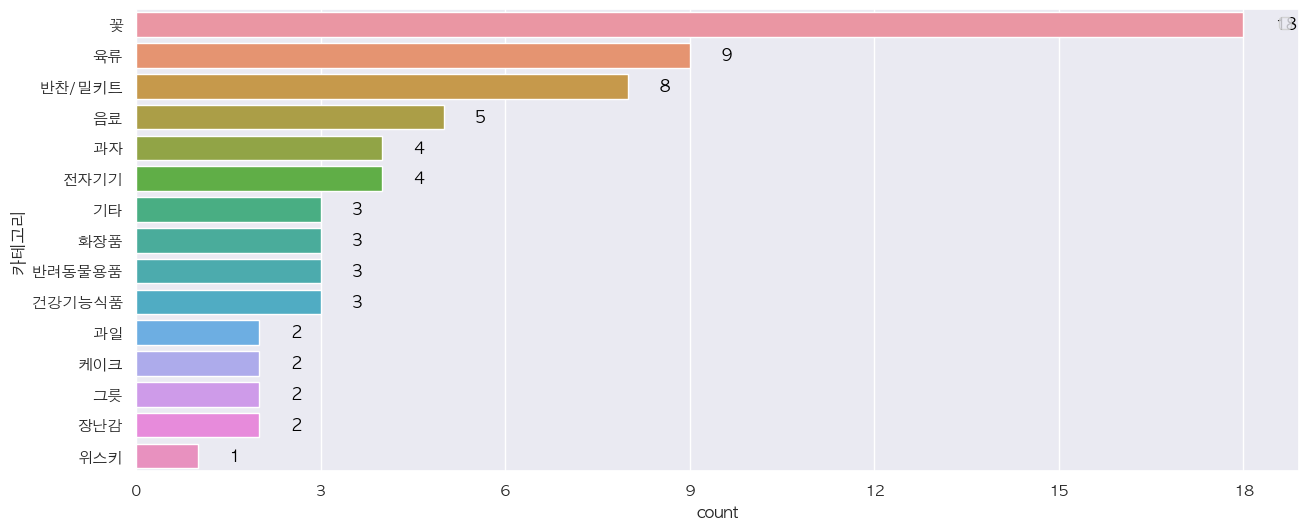

In [14]:
# 7. 카테고리별 unique 값에 대한 count값 
cat_count = bms_df['카테고리'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
sns.countplot(y="카테고리", data=bms_df, order = cat_count.index)
plt.xticks(range(0, max(cat_count) + 1, 3))  # 정수값으로 3 간격으로 설정

# 막대 오른쪽 끝에 값을 표시하는 로직 추가
for i, v in enumerate(cat_count.values):
    plt.text(v+0.5, i, str(v), color='black', va='center')

plt.legend()
plt.show()

In [ ]:
# 선물은 회사에 받는사람의 주소 데이터가 있을 것임. 그 여부를 확인하면 선물인지 아닌지 나오니까!
# 거기서 제일 많이 나온 친구 = 수요가 가장 높다 = 8월 25일 금요일 오후 4시, 강남역에서 가장 인기가 많은 상품 카테고리는 " 꽃"
# 그 외에도 많이 나온 상품들을 보면, 꽃처럼 누군가에게 선물을 하려는 상품들이 많아보인다. : 저 카테고리 기반으로 나온 결과를 따라서 이게 선물용인지 아닌지 대략적으로 판단 가능
# 이게 시간적인 특성(오후4시)인지, 요일적인 특성(주말)인지, 시기적(8월, 여름이라서인지), 월말이라서인지, 위치(강남역)때문인지는 추가적인 데이터를 더 분석해보아야 한다.
# 입사해서 이런거 하고싶어요~ 하고 마무리하기.